In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
import datetime
%matplotlib inline

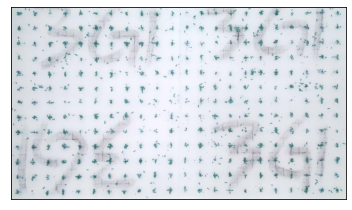

In [8]:
# 調整高斯參數
kernel_size = (3, 3)  # 高斯模糊矩陣大小
sigma =3  # 高斯模糊標準差參數(0=自動)
slice_img = cv2.imread("convert_rect.jpg")
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis 
plt.imshow(slice_img) 
plt.show()
grayImage = cv2.cvtColor(slice_img, cv2.COLOR_BGR2GRAY)  # gray(0-255) 圖像轉換灰階
grayImage = cv2.GaussianBlur(grayImage, kernel_size, sigma)  # GaussianBlur  圖校進行模糊化(高斯)
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage,  170, 255, cv2.THRESH_BINARY)  # black and white(0, 255)  圖像透過thershold閾值進行二元化 
slice_percent =  round(sum(sum(blackAndWhiteImage == 0))/100, 2)  # 計算黑色比例(作物占比)
cv2.imshow("rect", blackAndWhiteImage)

cv2.waitKey(0)

cv2.destroyAllWindows()

In [1]:
# 載入class確認發芽閾值
from ger import germination
aaa = germination('3g1', '2020/1/31')
print(aaa)
aaa.get_photo()

作物編號: 3g1
播種日期: 2020-01-31
判斷日期: 2020-03-12
育苗天數: 41
閾值參數: 170
判斷條件: 0.2
結果暫存清單: 共0筆數據(詳細請看self.result_list)
拍攝照片...
裁切照片


72.66

In [2]:
# 確認閾值下照片的發芽情況
bad = []
for i in aaa.result_list:
    if i[2] < 0.2:
#         plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis 
#         plt.imshow(i)
#         plt.show()
        bad.append(i)
bad


[[0, 11, 0.16, 0],
 [3, 6, 0.19, 0],
 [3, 19, 0.18, 0],
 [5, 10, 0.04, 0],
 [6, 11, 0.19, 0],
 [6, 18, 0.14, 0],
 [12, 1, 0.15, 0]]

In [ ]:
# 照片裁切個別另存
img = cv2.imread("./data/convert_rect1.jpg")
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic') 
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis 
# plt.plot([200,300,400],[100,200,300],'c', linewidth=5) 
plt.show()
x = img.shape[0]
y = img.shape[1]
# 裁切區域的 x 與 y 座標（左上角）
top = 0  # 最上面(+h)
left = 0  # 最左邊(+w)

print(x, y)
for i in range(13):
    for j in range(22):
        slice_img = img[top:top+50, left:left+50]
        name = str(i)+'-'+str(j)+'.jpg'
        dirs = './testdata/'
        cv2.imwrite(dirs+name, slice_img)
        left = left + 50
    top = top +50
    left = 0
print('done')